In [1]:
import os
from __future__ import print_function
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
data_path = ['./dados/']
filepath = os.sep.join(data_path + ['economy.csv'])
data = pd.read_csv(filepath, sep=',')
data_orig = data.copy()
data2 = data.copy()

filepath = os.sep.join(data_path + ['results.csv'])
results = pd.read_csv(filepath, sep=',')

C:\Users\maria\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
def search_match_winer(match_id):
    row = results.loc[results['match_id'] == match_id]
    return row.head(1)['match_winner']

winner =[]
for i,row in data.iterrows():
    match_winner = search_match_winer(row['match_id'])
    winner.append(match_winner.values)


In [4]:

winner_pd= []
for win in winner:
    if win:
        winner_pd.append(win[0])
    else: 
        winner_pd.append(np.nan)

<ipython-input-4-5d363f5414b4>:3: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if win:


In [5]:
print(data.shape)
data['match_winner'] = pd.DataFrame(winner_pd)
print(data.shape)
data.dropna(subset=['match_winner'],inplace=True)
print(data.shape)

(43234, 99)
(43234, 100)
(31730, 100)


In [6]:
## DROPS date,match_id,event_id,best_of
data = data.drop(['date'], axis=1)
data = data.drop(['match_id'], axis=1)
data = data.drop(['event_id'], axis=1)
data = data.drop(['best_of'], axis=1)
data = data.drop(['team_1'], axis=1)
data = data.drop(['team_2'], axis=1)

In [7]:
data = data.replace(np.nan,0)
data.head(1)

,_map,t1_start,t2_start,1_t1,2_t1,3_t1,4_t1,5_t1,6_t1,7_t1,...,22_winner,23_winner,24_winner,25_winner,26_winner,27_winner,28_winner,29_winner,30_winner,match_winner
0,Nuke,t,ct,4350.0,1100.0,22100.0,9350.0,25750.0,10400.0,24600.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [8]:
data.describe()

,1_t1,2_t1,3_t1,4_t1,5_t1,6_t1,7_t1,8_t1,9_t1,10_t1,...,22_winner,23_winner,24_winner,25_winner,26_winner,27_winner,28_winner,29_winner,30_winner,match_winner
count,31730.000000,31730.000000,31730.000000,31730.000000,31730.000000,31730.000000,31730.000000,31730.00000,31730.000000,31730.000000,...,31730.000000,31730.000000,31730.000000,31730.000000,31730.000000,31730.000000,31730.000000,31730.000000,31730.000000,31730.000000
mean,4160.469587,12879.071856,16318.985188,21061.809014,21786.541128,22441.404034,22605.586196,22986.24803,22949.583990,23168.179956,...,1.234920,1.138639,1.032241,0.918657,0.803656,0.673401,0.542042,0.413300,0.281059,1.461551
std,332.273985,6975.386133,8831.595565,7932.430648,8404.822775,8476.874467,8564.999158,8420.18446,8572.281992,8402.930300,...,0.724595,0.771288,0.802664,0.824876,0.833083,0.815411,0.777541,0.716438,0.621343,0.498527
min,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000,200.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4100.000000,6900.000000,7550.000000,20250.000000,20600.000000,21050.000000,21250.000000,21750.00000,21600.000000,21900.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4250.000000,15550.000000,20500.000000,23700.000000,24600.000000,25300.000000,25500.000000,25700.00000,25750.000000,25800.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4300.000000,19200.000000,23000.000000,26000.000000,27150.000000,27900.000000,28000.000000,28350.00000,28400.000000,28550.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,2.000000
max,10700.000000,29000.000000,31450.000000,34400.000000,35100.000000,35400.000000,37250.000000,37800.00000,39800.000000,36600.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


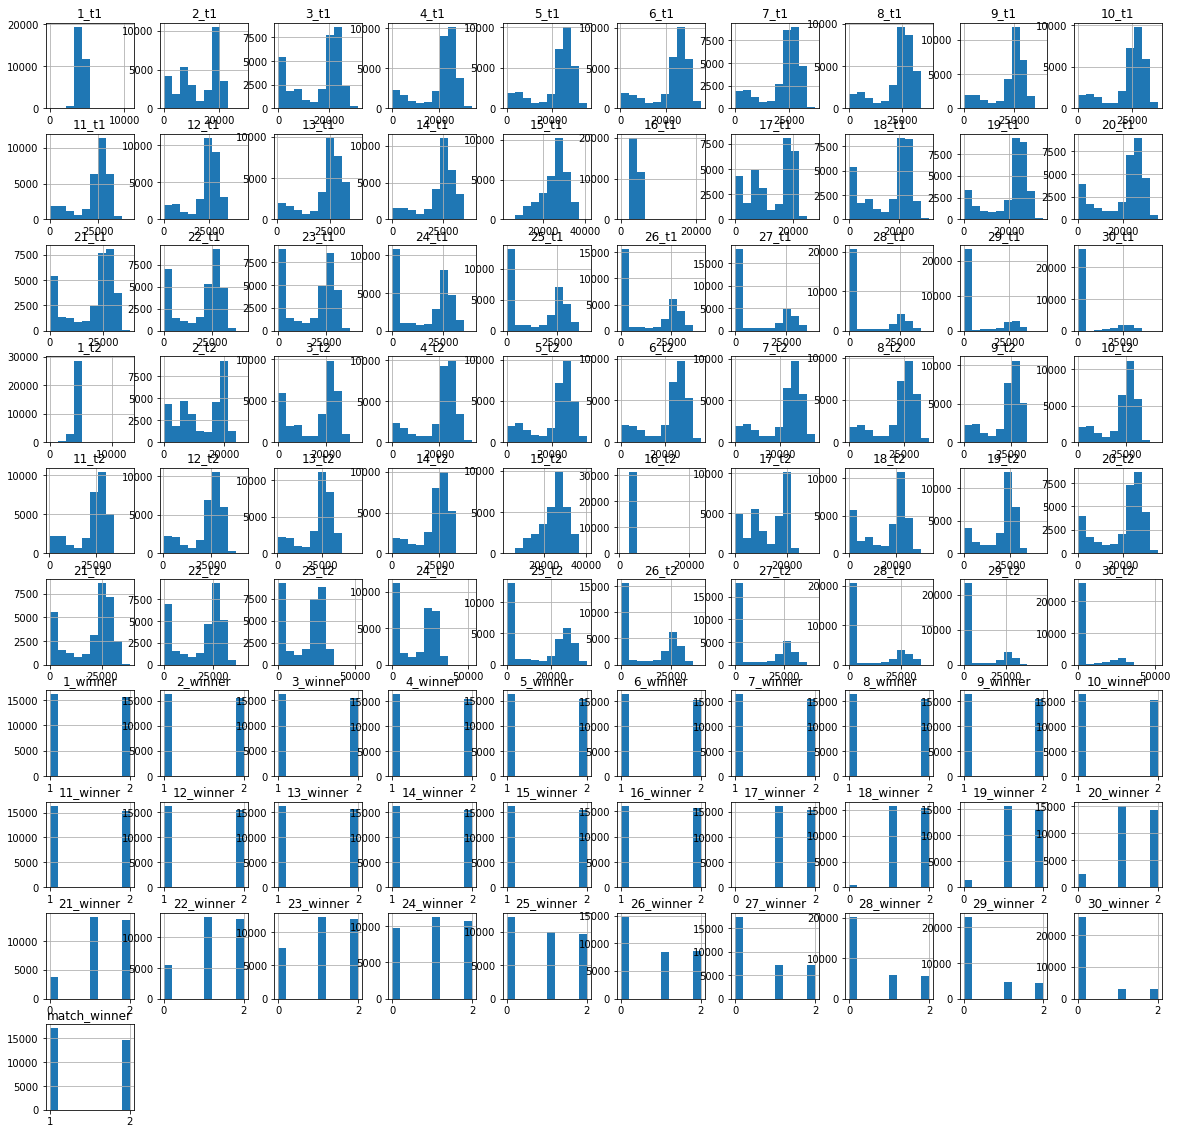

In [9]:
p = data.hist(figsize = (20,20))

In [10]:
print(data.dtypes)

_map             object
t1_start         object
t2_start         object
1_t1            float64
2_t1            float64
                 ...   
27_winner       float64
28_winner       float64
29_winner       float64
30_winner       float64
match_winner    float64
Length: 94, dtype: object


In [11]:
# Aplicar one-hot-encoding nos dados categóricos

def oneHotEncoding(df, column):
    one_hot_encoded = pd.get_dummies(df[column])
    df = df.drop(column,axis = 1)
    df = df.join(one_hot_encoded)
    return df

data_aux = {}
pd.DataFrame(data_aux)
categorical_features = ['_map'] # ['_map', 'team_1', 'team_2']
for i in categorical_features:
    data_aux = oneHotEncoding(data, i)
    data= data_aux.copy()

In [12]:
data.head(1)

,t1_start,t2_start,1_t1,2_t1,3_t1,4_t1,5_t1,6_t1,7_t1,8_t1,...,Cache,Cobblestone,Default,Dust2,Inferno,Mirage,Nuke,Overpass,Train,Vertigo
0,t,ct,4350.0,1100.0,22100.0,9350.0,25750.0,10400.0,24600.0,8150.0,...,0,0,0,0,0,0,1,0,0,0


In [13]:
## estamos subistiuindo para inteiros onde t = o e ct =1 
data['t1_start'] = data['t1_start'].replace('t',0)
data['t1_start'] = data['t1_start'].replace('ct',1)
data['t2_start'] = data['t2_start'].replace('t',0)
data['t2_start'] = data['t2_start'].replace('ct',1)

In [14]:
data.keys()

Index(['t1_start', 't2_start', '1_t1', '2_t1', '3_t1', '4_t1', '5_t1', '6_t1',
       '7_t1', '8_t1',
       ...
       'Cache', 'Cobblestone', 'Default', 'Dust2', 'Inferno', 'Mirage', 'Nuke',
       'Overpass', 'Train', 'Vertigo'],
      dtype='object', length=103)

In [15]:
# Convert to floats
for col in data.columns:
    data[col] = data[col].astype(np.float)
data.dtypes

<ipython-input-15-fe815165c760>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data[col] = data[col].astype(np.float)


t1_start    float64
t2_start    float64
1_t1        float64
2_t1        float64
3_t1        float64
             ...   
Mirage      float64
Nuke        float64
Overpass    float64
Train       float64
Vertigo     float64
Length: 103, dtype: object

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
data = data.reset_index(drop=True)
X = data.drop('match_winner', axis=1)
y = data.match_winner
sss = StratifiedShuffleSplit(n_splits=10, random_state=50)

def get_avg_score(n):
    pipe = [
        ('scaler', MinMaxScaler()),
        ('pca', PCA(n_components=n)),
        ('estimator', LogisticRegression(max_iter=1000))
    ]
    pipe = Pipeline(pipe)
    scores = []
    
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        pipe.fit(X_train, y_train)
        scores.append(accuracy_score(y_test, pipe.predict(X_test)))
    return np.mean(scores)


ns = np.arange(1,103)
score_list = [get_avg_score(n) for n in ns]

C:\Users\rober\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rober\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/m

[0.5472423573904821, 0.7055783170501103, 0.7073747242357389, 0.710463283958399, 0.7267254963756697, 0.7323983611723921, 0.7370942325874568, 0.7379136463914276, 0.7387015442798612, 0.7398046013236684, 0.7417901040025212, 0.7521273242987708, 0.7520327765521589, 0.7520012606366214, 0.7511818468326505, 0.7515915537346359, 0.7522533879609202, 0.7579892845887172, 0.7582098959974788, 0.7598487236054208, 0.7587141506460762, 0.7606051055783171, 0.7624330286794831, 0.7620863536085725, 0.7745351402458241, 0.7958398991490704, 0.7958714150646076, 0.7965647652064293, 0.796816892530728, 0.7971005357705641, 0.7976678222502364, 0.7991805861960289, 0.8078789788843365, 0.8098959974787266, 0.8098014497321147, 0.8091396155058306, 0.8105263157894738, 0.809643870154428, 0.8100850929719507, 0.8092026473369052, 0.8096753860699654, 0.8107469271982352, 0.8107784431137723, 0.8122281752284903, 0.8125748502994012, 0.8124172707217145, 0.8126693980460132, 0.814276709738418, 0.8155058304443745, 0.8153167349511502, 0.8

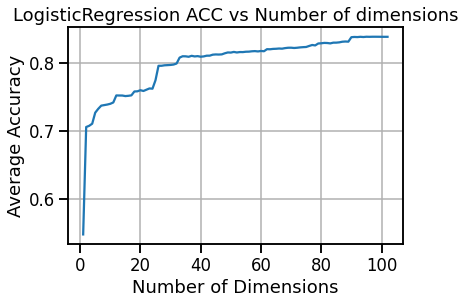

In [22]:
sns.set_context('talk')
ax = plt.axes()
ax.plot(ns, score_list)
ax.set(xlabel='Number of Dimensions',
       ylabel='Average Accuracy',
       title='LogisticRegression ACC vs Number of dimensions')
ax.grid(True)
plt.savefig(f'StandardScaler.png', dpi=100)
print(score_list)

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
data = data.reset_index(drop=True)
X = data.drop('match_winner', axis=1)
y = data.match_winner
sss = StratifiedShuffleSplit(n_splits=10, random_state=50)

def get_avg_score(n):
    pipe = [
        ('scaler', MinMaxScaler()),
        ('pca', PCA(n_components=n)),
        ('estimator', RandomForestClassifier())
    ]
    pipe = Pipeline(pipe)
    scores = []
    
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        pipe.fit(X_train, y_train)
        scores.append(accuracy_score(y_test, pipe.predict(X_test)))
    return np.mean(scores)

ns_2 = np.arange(1,103)
score_list_2 = [get_avg_score(n) for n in ns_2]

[0.5660888748818154, 0.6923731484399622, 0.6991175543649544, 0.7192562243933185, 0.7623069650173337, 0.7740939174283012, 0.7754806177119445, 0.7730223763000316, 0.7768988339111251, 0.7747242357390481, 0.7739048219350773, 0.7766782225023636, 0.773967853766152, 0.7741884651749134, 0.7720453829183738, 0.7774661203907973, 0.7739048219350771, 0.7783170501103057, 0.7785691774346046, 0.7776867317995588, 0.7765206429246769, 0.775260006303183, 0.774156949259376, 0.7775291522218721, 0.7878663725181216, 0.7901040025212731, 0.7949574535140245, 0.7882130475890324, 0.7883706271667192, 0.7934131736526946, 0.7933186259060826, 0.7924046643554996, 0.7954301922470848, 0.7956823195713836, 0.7970059880239521, 0.797541758588087, 0.7962180901355185, 0.7971635676016388, 0.7970059880239522, 0.7967853766151907, 0.7961865742199811, 0.7963126378821306, 0.7978569177434605, 0.796816892530728, 0.7974787267570124, 0.7974787267570124, 0.7970059880239522, 0.8031515915537346, 0.8042546485975418, 0.8068074377560668, 0.80

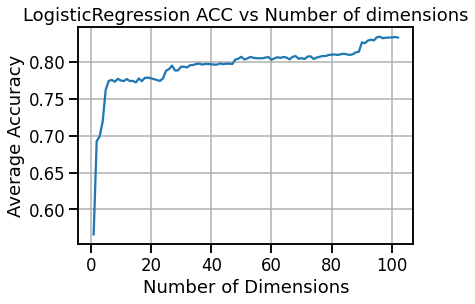

In [28]:
sns.set_context('talk')
ax = plt.axes()
ax.plot(ns_2, score_list_2)
ax.set(xlabel='Number of Dimensions',
       ylabel='Average Accuracy',
       title='LogisticRegression ACC vs Number of dimensions')
ax.grid(True)
plt.savefig(f'StandardScaler.png', dpi=100)
print(score_list_2)

In [16]:
vect = [0.56615190671289, 0.6887488181531674, 0.7008509297195085, 0.7167349511503309, 0.7616136148755122, 0.7743775606681373, 0.7754806177119445, 0.7727387330601954, 0.7746296879924361]



In [17]:
avg_acc_lr=[0.5472423573904821, 0.7055783170501103, 0.7073747242357389, 0.710463283958399, 0.7267254963756697, 0.7323983611723921, 0.7370942325874568, 0.7379136463914276, 0.7387015442798612, 0.7398046013236684, 0.7417901040025212, 0.7521273242987708, 0.7520327765521589, 0.7520012606366214, 0.7511818468326505, 0.7515915537346359, 0.7522533879609202, 0.7579892845887172, 0.7582098959974788, 0.7598487236054208, 0.7587141506460762, 0.7606051055783171, 0.7624330286794831, 0.7620863536085725, 0.7745351402458241, 0.7958398991490704, 0.7958714150646076, 0.7965647652064293, 0.796816892530728, 0.7971005357705641, 0.7976678222502364, 0.7991805861960289, 0.8078789788843365, 0.8098959974787266, 0.8098014497321147, 0.8091396155058306, 0.8105263157894738, 0.809643870154428, 0.8100850929719507, 0.8092026473369052, 0.8096753860699654, 0.8107469271982352, 0.8107784431137723, 0.8122281752284903, 0.8125748502994012, 0.8124172707217145, 0.8126693980460132, 0.814276709738418, 0.8155058304443745, 0.8153167349511502, 0.8162937283328082, 0.8154743145288371, 0.8161046328395839, 0.8160416010085093, 0.8165773715726441, 0.8167034352347935, 0.8172392057989285, 0.8174913331232272, 0.817018594390167, 0.8176804286164513, 0.8173022376300032, 0.8203277655215884, 0.820201701859439, 0.820737472423574, 0.8209265679167979, 0.8213047589032462, 0.8210841474944847, 0.8219035612984558, 0.8224393318625906, 0.8225023636936653, 0.8220926567916799, 0.8224393318625906, 0.8229751024267256, 0.8233217774976364, 0.823573904821935, 0.8250866687677277, 0.8265048849669082, 0.8258745666561614, 0.8287109990545225, 0.829026158209896, 0.8295934446895682, 0.8294358651118815, 0.8288685786322093, 0.8299401197604791, 0.8299716356760163, 0.8304128584935393, 0.8313268200441224, 0.8316419791994958, 0.8314213677907343, 0.8380081941380398, 0.8383548692089505, 0.8381657737157264, 0.838575480617712, 0.8382603214623383, 0.838670028364324, 0.8385439647021746, 0.838670028364324, 0.838670028364324, 0.8386385124487866, 0.838575480617712, 0.838575480617712, 0.838575480617712]
avg_acc_rf=[0.5660888748818154, 0.6923731484399622, 0.6991175543649544, 0.7192562243933185, 0.7623069650173337, 0.7740939174283012, 0.7754806177119445, 0.7730223763000316, 0.7768988339111251, 0.7747242357390481, 0.7739048219350773, 0.7766782225023636, 0.773967853766152, 0.7741884651749134, 0.7720453829183738, 0.7774661203907973, 0.7739048219350771, 0.7783170501103057, 0.7785691774346046, 0.7776867317995588, 0.7765206429246769, 0.775260006303183, 0.774156949259376, 0.7775291522218721, 0.7878663725181216, 0.7901040025212731, 0.7949574535140245, 0.7882130475890324, 0.7883706271667192, 0.7934131736526946, 0.7933186259060826, 0.7924046643554996, 0.7954301922470848, 0.7956823195713836, 0.7970059880239521, 0.797541758588087, 0.7962180901355185, 0.7971635676016388, 0.7970059880239522, 0.7967853766151907, 0.7961865742199811, 0.7963126378821306, 0.7978569177434605, 0.796816892530728, 0.7974787267570124, 0.7974787267570124, 0.7970059880239522, 0.8031515915537346, 0.8042546485975418, 0.8068074377560668, 0.8032146233848094, 0.8045698077529153, 0.8066498581783801, 0.8055152852190357, 0.8049164828238261, 0.804821935077214, 0.804821935077214, 0.8057674125433344, 0.8064292467696188, 0.8027734005672865, 0.8047904191616766, 0.8061771194453199, 0.8053261897258116, 0.8066183422628427, 0.8058304443744092, 0.803277655215884, 0.8067759218405295, 0.8077844311377245, 0.8041285849353924, 0.8049164828238261, 0.8038449416955563, 0.8071225969114402, 0.8074377560668138, 0.8038134257800188, 0.805735896627797, 0.8069019855026788, 0.8078474629687993, 0.8078474629687993, 0.809297195083517, 0.8097699338165774, 0.8099905452253389, 0.8092656791679799, 0.8103057043807123, 0.8109045067759219, 0.8101481248030256, 0.809297195083517, 0.810274188465175, 0.8128900094547745, 0.813646391427671, 0.826378821304759, 0.8252442483454144, 0.8287740308855973, 0.8301292152537032, 0.829026158209896, 0.8333753545540498, 0.8340056728647968, 0.8319571383548692, 0.8327450362433029, 0.8329026158209896, 0.8330917113142137, 0.8336274818783485, 0.8328710999054522]

In [40]:
# LR
indice_lr_1 = avg_acc_lr.index(0.8314213677907343)
indice_lr_2 = avg_acc_lr.index(0.8380081941380398)
print('indice_lr_1: ', indice_lr_1)
print('indice_lr_2: ', indice_lr_2)

# RF
indice_rf_1 = avg_acc_rf.index(0.813646391427671)
indice_rf_2 = avg_acc_rf.index(0.826378821304759)
print('indice_rf_1: ', indice_rf_1)
print('indice_rf_2: ', indice_rf_2)

print(avg_acc_lr[63])
print(avg_acc_lr[64])

indice_lr_1:  88
indice_lr_2:  89
indice_rf_1:  88
indice_rf_2:  89
0.820737472423574
0.8209265679167979


Variância explicada

Representa a informação explicada usando componentes principais específicos 

Fonte: https://vitalflux.com/pca-explained-variance-concept-python-example/#:~:text=Explained%20variance%20is%20calculated%20as,decomposition%20PCA%20class.

In [18]:
data = data.reset_index(drop=True)
datax = data.copy()

In [21]:
# PCA - verificação da variância explicada
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

features = list(data.keys())
features.remove('match_winner')
target = ['match_winner']

x = data.loc[:, features].values
y = data.loc[:,['match_winner']].values
# Normalização
x = MinMaxScaler().fit_transform(x)

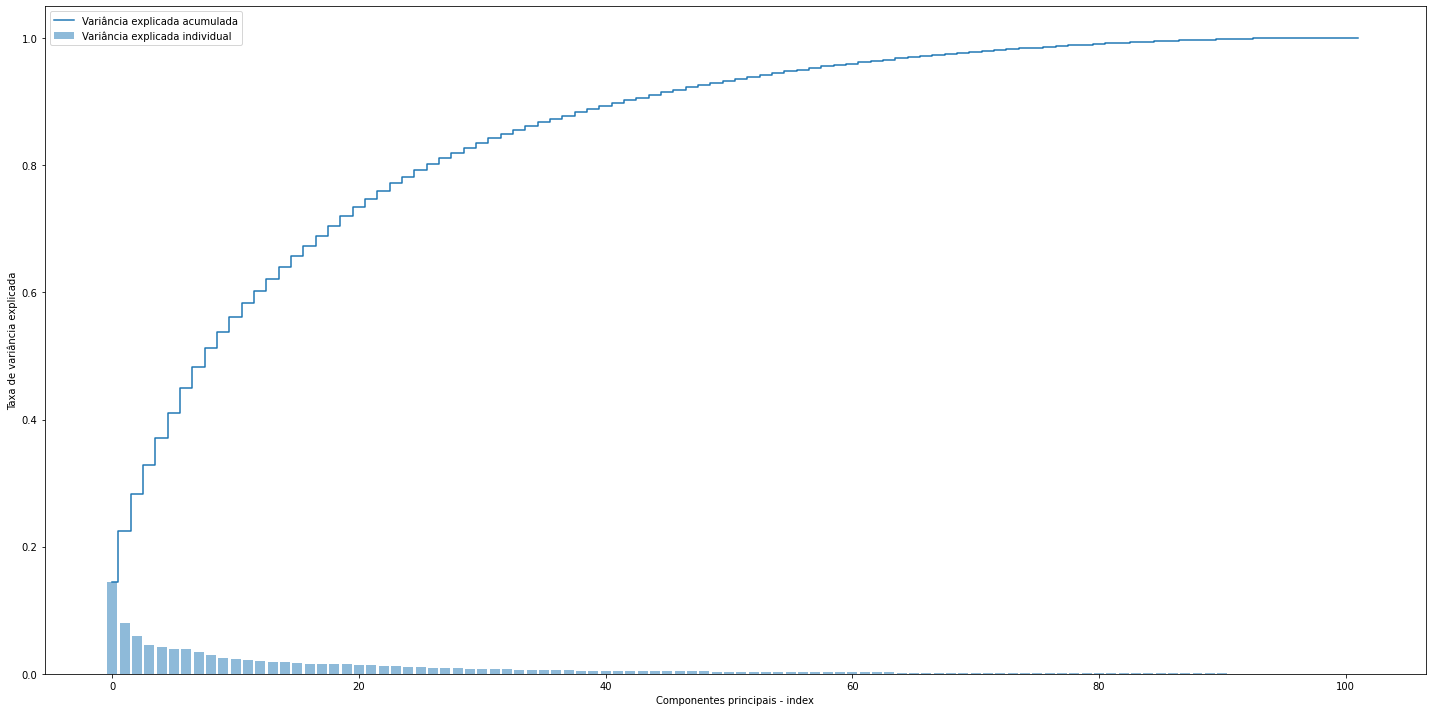

In [22]:
pca = PCA()
principalComponents = pca.fit_transform(x)
var_explicada_pca = pca.explained_variance_ratio_

soma_acumulada = np.cumsum(var_explicada_pca)
plt.rcParams["figure.figsize"] = (20,10)
plt.bar(range(0,len(var_explicada_pca)), var_explicada_pca, alpha=0.5, align='center', label='Variância explicada individual')
plt.step(range(0,len(soma_acumulada)), soma_acumulada, where='mid',label='Variância explicada acumulada')
plt.ylabel('Taxa de variância explicada')
plt.xlabel('Componentes principais - index')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig(f'var_explicada_pca.png', dpi=100)

plt.show()

<p>Pela observação do gráfico, a variância explicada para mais que 63 features é muito pequena</p>

In [81]:
#arr = list(pca.explained_variance_ratio_)
arr1 = [0.14478959053629523, 0.07972788292961773, 0.058691528799623874, 0.045905120254402555, 0.0417086946228618, 0.03979502643034328, 0.03830395695475335, 0.0343575732794234, 0.029492379139370813, 0.025563791473178877, 0.022637393630545784, 0.02164171269675455, 0.02032857162524967, 0.018683553251879776, 0.018519698008509486, 0.016981625206059486, 0.0160312584866385, 0.015713808857096855, 0.015613630413323096, 0.014999853613208393, 0.01431017135749224, 0.013461694409161907, 0.012696371582476544, 0.011851048043756102, 0.01054507516391511, 0.010253731465429126, 0.00937857648641439, 0.008974157107611609, 0.008745747788321549, 0.008119357774296313, 0.007759769399666452, 0.006930934615815729, 0.00678598737779912, 0.006558444570847724, 0.005837415139412125, 0.005723284350559159, 0.005480452145350773, 0.0053151679701088665, 0.005059785102779613, 0.004882979174872305, 0.0048075156747013, 0.004707077338342335, 0.004543411760049146, 0.004255320210956077, 0.004153236431824411, 0.00409617821051911, 0.003941183030410803, 0.0037841658871037537, 0.0036245992946773147, 0.0035627548317003193, 0.0033157505426385588, 0.003267951118679277, 0.003168810715639585, 0.0030947473435926527, 0.002860384628410312, 0.0027788863150397733, 0.0025876848622632316, 0.002392788919132544, 0.002349339917274516, 0.0023270898407038018, 0.0022373347637897837, 0.0022066898823044417, 0.00207131514970745, 0.0020619940084826384, 0.0020154079359136112, 0.0018878968732616531, 0.0018031489586181624, 0.0017170503540337822, 0.0017133419325649705, 0.001655319598705247, 0.0014866667382399206, 0.0014668550170915929, 0.0014225687353285276, 0.0013621325726695208, 0.0012360651839370463, 0.001204840697408604, 0.001169371355150337, 0.0011429359634473318, 0.0011078490584331222, 0.001055364395486215, 0.0010366782269757191, 0.0009903249694526194, 0.0009525160896604756, 0.0008612985183101251, 0.0008274338062617944, 0.0007450184227108832, 0.0007125838294545921, 0.0006777684955779322, 0.0006686633947480753, 0.0006143954822478484, 0.0005304710843855805, 0.000427986193445068, 0.00038595252860612546, 0.00034280032256606423, 0.00020350183945838063, 8.466736023496307e-05, 5.166441223029886e-05, 3.5845064351311606e-05, 3.378458855395718e-05, 1.6818087312125927e-05, 3.49683711151829e-29, 2.855396625372278e-32]
print(arr1[63])
arr2 = [0.14478959053629523, 0.07972788292961773, 0.058691528799623874, 0.045905120254402555, 0.0417086946228618, 0.03979502643034328, 0.03830395695475335, 0.0343575732794234, 0.029492379139370813, 0.025563791473178877, 0.022637393630545784, 0.02164171269675455, 0.02032857162524967, 0.018683553251879776, 0.018519698008509486, 0.016981625206059486, 0.0160312584866385, 0.015713808857096855, 0.015613630413323096, 0.014999853613208393, 0.01431017135749224, 0.013461694409161907, 0.012696371582476544, 0.011851048043756102, 0.01054507516391511, 0.010253731465429126, 0.00937857648641439]
arr3 = [0.14478959053629523, 0.07972788292961773, 0.058691528799623874, 0.045905120254402555, 0.0417086946228618, 0.03979502643034328, 0.03830395695475335, 0.0343575732794234, 0.029492379139370813, 0.025563791473178877, 0.022637393630545784, 0.02164171269675455, 0.02032857162524967, 0.018683553251879776, 0.018519698008509486, 0.016981625206059486, 0.0160312584866385, 0.015713808857096855, 0.015613630413323096, 0.014999853613208393, 0.01431017135749224, 0.013461694409161907, 0.012696371582476544, 0.011851048043756102, 0.01054507516391511, 0.010253731465429126, 0.00937857648641439, 0.008974157107611609, 0.008745747788321549, 0.008119357774296313, 0.007759769399666452, 0.006930934615815729, 0.00678598737779912, 0.006558444570847724, 0.005837415139412125, 0.005723284350559159, 0.005480452145350773, 0.0053151679701088665, 0.005059785102779613, 0.004882979174872305, 0.0048075156747013, 0.004707077338342335, 0.004543411760049146, 0.004255320210956077, 0.004153236431824411, 0.00409617821051911, 0.003941183030410803, 0.0037841658871037537, 0.0036245992946773147, 0.0035627548317003193, 0.0033157505426385588, 0.003267951118679277, 0.003168810715639585, 0.0030947473435926527, 0.002860384628410312, 0.0027788863150397733, 0.0025876848622632316]
arr4 = [0.14478959053629523, 0.07972788292961773, 0.058691528799623874, 0.045905120254402555, 0.0417086946228618, 0.03979502643034328, 0.03830395695475335, 0.0343575732794234, 0.029492379139370813, 0.025563791473178877, 0.022637393630545784, 0.02164171269675455, 0.02032857162524967, 0.018683553251879776, 0.018519698008509486, 0.016981625206059486, 0.0160312584866385, 0.015713808857096855, 0.015613630413323096, 0.014999853613208393, 0.01431017135749224, 0.013461694409161907, 0.012696371582476544, 0.011851048043756102, 0.01054507516391511, 0.010253731465429126, 0.00937857648641439, 0.008974157107611609, 0.008745747788321549, 0.008119357774296313, 0.007759769399666452, 0.006930934615815729, 0.00678598737779912, 0.006558444570847724, 0.005837415139412125, 0.005723284350559159, 0.005480452145350773, 0.0053151679701088665, 0.005059785102779613, 0.004882979174872305, 0.0048075156747013, 0.004707077338342335, 0.004543411760049146]
print(len(arr4))
soma=0
for i in arr1:
    soma = soma+i
    if soma>=0.9:
        print(i)
        print(soma)
        break

0.0020619940084826384
43
0.004543411760049146
0.902214806008316


In [82]:
df_pca={}
def get_pca (n):
    acp = []
    for i in range(1,n+1):
        acp.append(f'PCA-{i}')

    pca = PCA(n)
    componentes_principais = pca.fit_transform(x)
    df_pca = pd.DataFrame(data = componentes_principais, columns = acp)
    df_pca = df_pca.reset_index(drop=True)
    return df_pca
df_pca=get_pca(102)

In [83]:
df_pca

,PCA-1,PCA-2,PCA-3,PCA-4,PCA-5,PCA-6,PCA-7,PCA-8,PCA-9,PCA-10,...,PCA-93,PCA-94,PCA-95,PCA-96,PCA-97,PCA-98,PCA-99,PCA-100,PCA-101,PCA-102
0,1.612990,2.149771,-0.002655,0.330539,-0.169099,-0.387657,-0.587216,0.601147,-0.251789,-0.267518,...,0.038033,0.010104,-0.002876,0.007343,-0.010179,0.000362,-0.005075,0.004375,3.444264e-12,-1.284883e-17
1,-1.282935,-0.479814,0.310069,-0.253837,1.206430,-1.043233,-0.795382,0.270829,-0.584032,-0.536722,...,0.054743,0.056282,0.050260,-0.029745,-0.034584,0.001143,0.002282,-0.004993,-6.144215e-19,2.068898e-15
2,1.824222,2.080737,-0.009397,0.470487,-0.206265,-1.091936,-0.454924,0.454162,0.318724,0.279662,...,-0.089869,0.082566,0.000868,0.005575,-0.002581,0.000271,0.009657,0.006903,-5.459315e-16,3.017472e-15
3,1.703067,-1.292716,0.415372,0.810534,-0.741141,0.344540,0.042288,0.263802,0.526070,0.122288,...,0.048489,0.021802,-0.003772,0.015860,0.009352,-0.001091,-0.002782,0.008891,-2.808081e-16,1.038255e-15
4,1.760797,-1.507289,-0.556009,-0.084602,-0.048052,0.158404,-0.934015,-0.564634,-0.561890,-0.532629,...,-0.019515,-0.023948,0.005880,-0.007195,0.001196,-0.001341,0.001035,-0.001894,-5.755243e-16,-1.216114e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31725,-0.111073,0.437406,0.978924,0.573037,1.643966,0.354862,-0.290248,-0.289396,-0.217988,-0.188005,...,0.044339,0.015450,-0.008391,0.007655,-0.004440,-0.000375,0.003214,0.009673,9.669376e-16,2.469392e-16
31726,-0.427742,0.665740,-0.720146,1.006315,-0.514410,0.389000,0.765511,1.252052,-0.495079,0.276583,...,-0.001814,-0.021229,-0.000179,0.007274,0.000571,-0.000411,-0.002900,-0.002892,-1.159231e-15,-5.172523e-16
31727,-0.728948,0.054352,0.114370,-0.854950,-0.016206,0.135610,-0.621096,-0.583402,-0.985646,-0.790487,...,0.093487,0.094407,-0.015642,0.025773,0.009138,0.000090,0.001650,0.004040,1.178044e-15,-5.288665e-17
31728,1.875846,-0.478731,-1.024729,1.489916,-0.560500,-0.698217,0.161265,-0.591824,0.207756,0.290593,...,-0.059919,-0.131326,0.001674,0.009489,0.008980,-0.000020,0.007596,-0.014550,7.063569e-17,7.452498e-17


In [84]:
pca.explained_variance_ratio_

array([1.44789591e-01, 7.97278829e-02, 5.86915288e-02, 4.59051203e-02,
       4.17086946e-02, 3.97950264e-02, 3.83039570e-02, 3.43575733e-02,
       2.94923791e-02, 2.55637915e-02, 2.26373936e-02, 2.16417127e-02,
       2.03285716e-02, 1.86835533e-02, 1.85196980e-02, 1.69816252e-02,
       1.60312585e-02, 1.57138089e-02, 1.56136304e-02, 1.49998536e-02,
       1.43101714e-02, 1.34616944e-02, 1.26963716e-02, 1.18510480e-02,
       1.05450752e-02, 1.02537315e-02, 9.37857649e-03, 8.97415711e-03,
       8.74574779e-03, 8.11935777e-03, 7.75976940e-03, 6.93093462e-03,
       6.78598738e-03, 6.55844457e-03, 5.83741514e-03, 5.72328435e-03,
       5.48045215e-03, 5.31516797e-03, 5.05978510e-03, 4.88297917e-03,
       4.80751567e-03, 4.70707734e-03, 4.54341176e-03, 4.25532021e-03,
       4.15323643e-03, 4.09617821e-03, 3.94118303e-03, 3.78416589e-03,
       3.62459929e-03, 3.56275483e-03, 3.31575054e-03, 3.26795112e-03,
       3.16881072e-03, 3.09474734e-03, 2.86038463e-03, 2.77888632e-03,
      

In [85]:
# Adiciona o target
finalDf = pd.concat([df_pca, data[['match_winner']]], axis = 1)

In [87]:
# Salva o resultado em um dataframe
finalDf.to_csv('finalDf-102.csv', sep=',', encoding='utf-8')

PCA 88
89 - acuracia ok
variancia explicada: 63 (explica 96,6% dos dados)
43 - explica 90%

In [89]:

def get_pca (n):
    acp = []
    for i in range(1,n+1):
        acp.append(f'PCA-{i}')

    pca = PCA(n)
    componentes_principais = pca.fit_transform(x)
    df_pca = pd.DataFrame(data = componentes_principais, columns = acp)
    df_pca = df_pca.reset_index(drop=True)
    return df_pca
    
n_pca = [43, 63, 88, 89, 102]
for i in n_pca:
    df_pca = {}
    finalDf = {}
    df_pca=get_pca(i)
    # Adiciona o target
    finalDf = pd.concat([df_pca, data[['match_winner']]], axis = 1)
    # Salva o resultado em um dataframe
    finalDf.to_csv(f'finalDf-{i}.csv', sep=',', encoding='utf-8')